## 12-2 파이썬으로 그래프를 그린다는건?

준비물
___
$ pip install matplotlib 
$ pip install seaborn

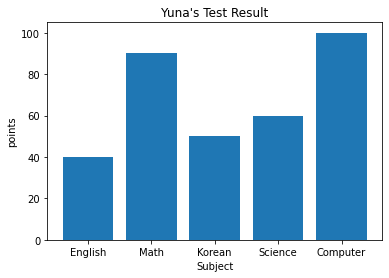

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# 그래프 데이터
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
ax1.bar(subject, points)

# 라벨, 타이틀 달기
plt.xlabel("Subject")
plt.ylabel("points")
plt.title("Yuna's Test Result")

# 보여주기
plt.savefig('./barplot.png') # 그래프를 이미지로 출력
plt.show()

- %matplotlib inline 은 Ipython에서 사용하는 매직 메소드 Rich output에 대한 표현 방식
- 그림, 소리, 애니메이션 과 같은 결과물을 Rich output 이라고 함

참고사이트 https://studymake.tistory.com/601